In [2]:
import time
from datetime import datetime, timedelta

import numpy as np
import mplcyberpunk
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
#
print("# Análises financeiras")
#
# # selic = sgs.get(('selic', 432), start = '2022-10-01')
# # selic.plot(figsize = (15, 10))
# # volatilidade_12m_ibov.plot(figsize = (15, 10))
# # plt.title("Dados Ibovespa e S&P500")
#
#
# # Pegando dados do yahoo finance.
#
indices = ['^BVSP', '^GSPC']
hoje = datetime.now()
um_ano_atras = hoje - timedelta(days = 366)
dados_mercado = pdr.get_data_yahoo(indices, start = um_ano_atras, end = hoje)
#
#
# # Pegando fechamento de cada ativo
#
dados_fechamento = dados_mercado['Adj Close']
dados_fechamento.columns = ["Ibov", "S&P500"]
dados_fechamento = dados_fechamento.dropna()
#
#
# # Pegando fechamento mensal e anual para calcular rentabilidades
#
dados_anuais = dados_fechamento.resample("Y").last()
dados_mensais = dados_fechamento.resample("M").last()
#
#
# # Calculando rentabilidades
#
retorno_diario = dados_fechamento.pct_change().dropna()
retorno_mes_a_mes = dados_mensais.pct_change().dropna()
retorno_mes_a_mes = retorno_mes_a_mes.iloc[1: , :]
retorno_no_ano = dados_anuais.pct_change().dropna()
#
#
# # Fechamento de dia
#
fechamento_de_dia = retorno_diario.iloc[-1, :]
#
#
# # Volatilidade ibov e S&P500
#
volatilidade_12m_ibov = retorno_diario['Ibov'].std() * np.sqrt(252)
volatilidade_12m_sp = retorno_diario['S&P500'].std() * np.sqrt(252)

# Análises financeiras


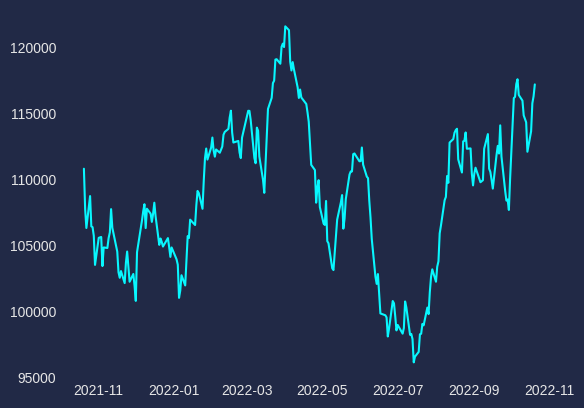

In [5]:
# # Volatilidade ibov
#
fig, ax = plt.subplots()
plt.style.use("cyberpunk")
ax.plot(dados_fechamento.index, dados_fechamento['Ibov'])
ax.grid(False)
plt.savefig('ibov.png', dpi = 300)

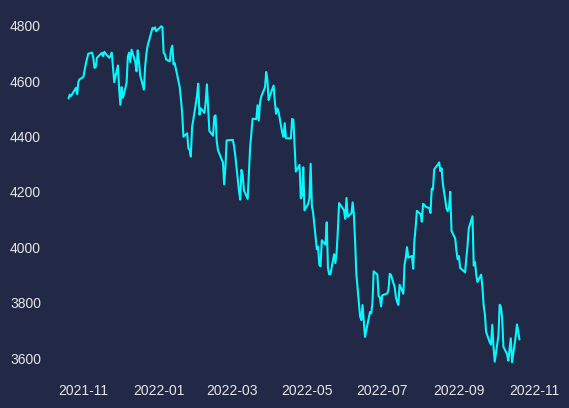

In [4]:
# # Volatilidade S&P500
#
fig, ax = plt.subplots()
plt.style.use("cyberpunk")
ax.plot(dados_fechamento.index, dados_fechamento['S&P500'])
ax.grid(False)
plt.savefig('sp.png', dpi = 300)